In [1]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('reviews_t.csv')

# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
print(df.head())

        Time_submitted                                             Review  \
0  2022-07-09 15:00:00  Great music service, the audio is high quality...   
1  2022-07-09 14:21:22  Please ignore previous negative rating. This a...   
2  2022-07-09 13:27:32  This pop-up "Get the best Spotify experience o...   
3  2022-07-09 13:26:45    Really buggy and terrible to use as of recently   
4  2022-07-09 13:20:49  Dear Spotify why do I get songs that I didn't ...   

   Rating  Total_thumbsup  
0       5               2  
1       5               1  
2       4               0  
3       1               1  
4       1               1  


In [2]:
df

,Time_submitted,Review,Rating,Total_thumbsup
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1
...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1


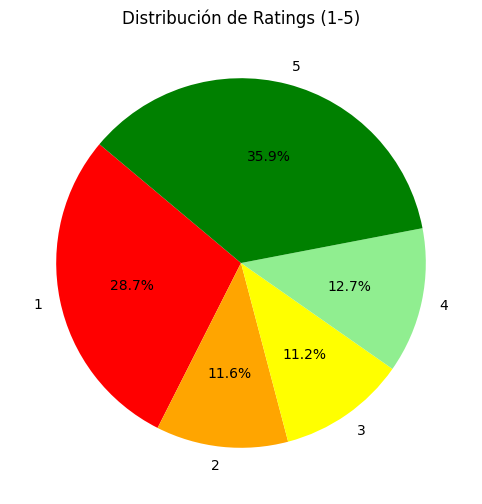

In [3]:
# Contar la frecuencia de cada rating
rating_counts = df['Rating'].value_counts().sort_index()
import matplotlib.pyplot as plt

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'yellow', 'lightgreen', 'green'])

# Añadir título
plt.title('Distribución de Ratings (1-5)')

# Mostrar el gráfico
plt.show()

In [6]:
# Filtrar las filas donde el Rating es igual a 5 y seleccionar las columnas 'Review' y 'Rating'
reviews_rating_5 = df[df['Rating'] == 5][['Review', 'Rating']]
# Mostrar la tabla
reviews_rating_5

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
6,I love the selection and the lyrics are provid...,5
8,It's a great app and the best mp3 music app I ...,5
14,i hav any music that i like it is super🙌,5
...,...,...
61574,"Spotify has all the music I need, always up to...",5
61575,"It literally has every song,genre,podcast that...",5
61579,I've been using Spotify for about 3+ years now...,5
61581,This app has remixes from Music Artist that I'...,5


In [11]:
import pandas as pd

# Supongamos que ya tienes el DataFrame df cargado
# df = pd.read_csv('reviews_t.csv')

# Calcular la longitud de cada revisión
df['Review_Length'] = df['Review'].str.len()

# Encontrar el índice de la revisión más larga
idx_longest_review = df['Review_Length'].idxmax()

# Obtener la revisión más larga
longest_review = df.loc[idx_longest_review, 'Review']

# Mostrar la revisión más larga
print("La revisión más larga es:")
print(longest_review)

# Mostrar la longitud de la revisión más larga
print(f"Longitud: {len(longest_review)} caracteres")
df = df.dropna(subset=['Review'])  # Eliminar filas con valores nulos en 'Review'

La revisión más larga es:
I very rarely leave reviews and if I do, they're almost never negative but I feel compelled in this instance, as the Spotify app has got to be the worst app I have ever used. I'm on pay as you go with no Internet access unless I'm on Wi-Fi and all I use this app for is to listen to podcasts which I download in full before my work commute. It's obvious it simply has not been designed with any consideration for a user like myself. I would go as far as to state that it's terrible for podcasts in general, regardless of how you use your phone. To give you some examples: 1. When I'm at work, my phone will connect to the work Wi-Fi. There's an internal authorisation process to let devices use Internet when on the company network. What happens is that I can't play any podcasts if my phone's Wi-Fi is on - I press the play button, but nothing happens. I have two phones, one authorised to use the network and one not and this happens on both of them. I think what is takin

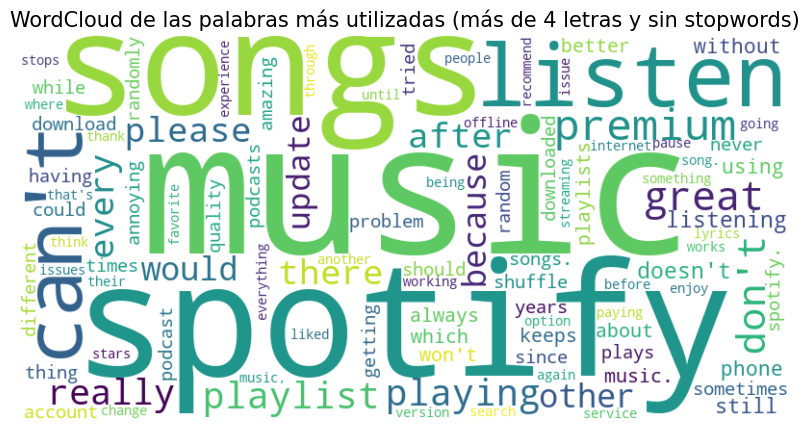

In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Supongamos que ya tienes el DataFrame df cargado
# df = pd.read_csv('reviews_t.csv')

# Combinar todas las revisiones en un solo texto
all_reviews = ' '.join(df['Review'].dropna())  # Ignorar valores nulos

# Convertir el texto a minúsculas y dividirlo en palabras
words = all_reviews.lower().split()
# Lista de palabras irrelevantes (stopwords)
stopwords = {"i", "I", "the", "is", "it", "and", "but", "you", "if", "a", "un", "so", "of"}

# Filtrar palabras con más de 4 letras y que no estén en la lista de stopwords
filtered_words = [word for word in words if len(word) > 4 and word not in stopwords]

# Contar la frecuencia de las palabras filtradas
word_freq_filtered = Counter(filtered_words)

# Generar el WordCloud con las palabras filtradas
wordcloud_filtered = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate_from_frequencies(word_freq_filtered)

# Mostrar el WordCloud filtrado
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud de las palabras más utilizadas (más de 4 letras y sin stopwords)", fontsize=15)
plt.show()

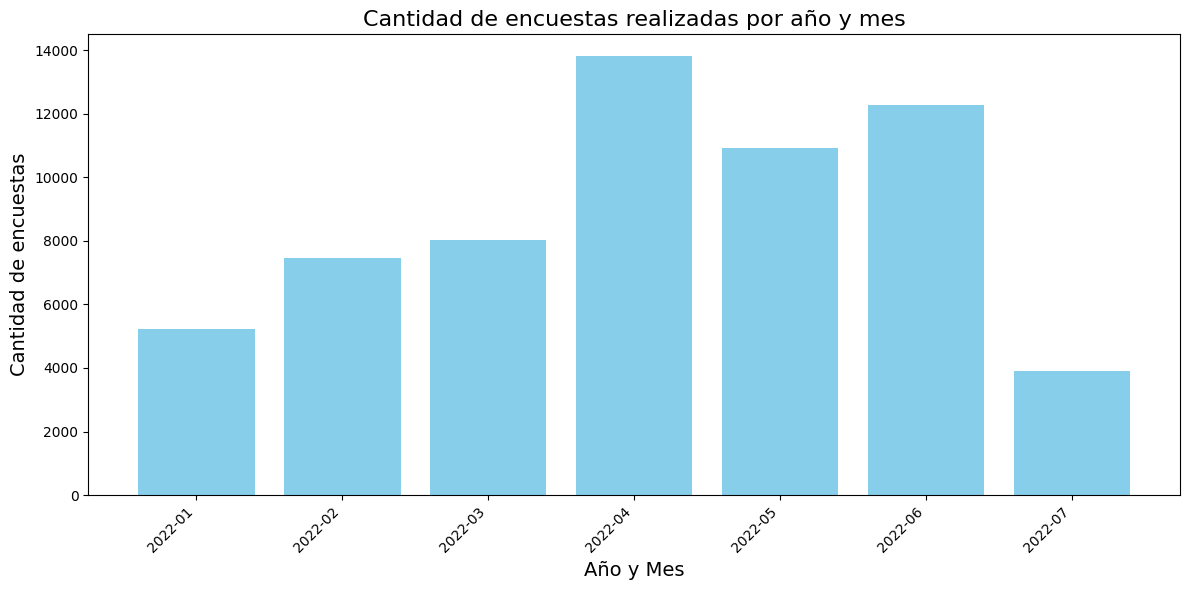

In [19]:
import pandas as pd

# Supongamos que ya tienes el DataFrame df cargado
# df = pd.read_csv('reviews_t.csv')

# Convertir la columna 'Time_submitted' a tipo datetime
df['Time_submitted'] = pd.to_datetime(df['Time_submitted'])

# Extraer el año y el mes de cada fecha
df['Year'] = df['Time_submitted'].dt.year
df['Month'] = df['Time_submitted'].dt.month
# Agrupar por año y mes y contar las encuestas
year_month_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Crear una columna combinada de año y mes
year_month_counts['Year_Month'] = year_month_counts['Year'].astype(str) + '-' + year_month_counts['Month'].astype(str).str.zfill(2)
import matplotlib.pyplot as plt

# Crear el diagrama de barras
plt.figure(figsize=(12, 6))
plt.bar(year_month_counts['Year_Month'], year_month_counts['Count'], color='skyblue')

# Añadir título y etiquetas
plt.title('Cantidad de encuestas realizadas por año y mes', fontsize=16)
plt.xlabel('Año y Mes', fontsize=14)
plt.ylabel('Cantidad de encuestas', fontsize=14)

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

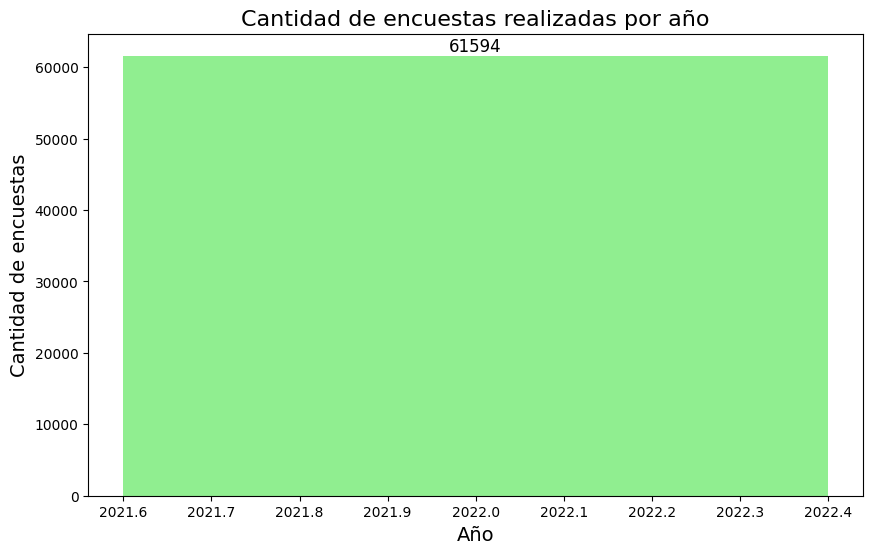

In [18]:
# Crear el diagrama de barras con personalización
plt.figure(figsize=(10, 6))
bars = plt.bar(year_counts.index, year_counts.values, color='lightgreen')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height),
             ha='center', va='bottom', fontsize=12)

# Añadir título y etiquetas
plt.title('Cantidad de encuestas realizadas por año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de encuestas', fontsize=14)

# Mostrar el gráfico
plt.show()

In [20]:
import pandas as pd
from textblob import TextBlob

# Supongamos que ya tienes el DataFrame df cargado
# df = pd.read_csv('reviews_t.csv')

# Función para calcular la polaridad del sentimiento
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Asegurarse de que el texto sea una cadena
    return analysis.sentiment.polarity

# Aplicar la función a la columna 'Review'
df['Sentiment_Polarity'] = df['Review'].apply(get_sentiment)

# Clasificar las revisiones como "buenas" o "malas"
df['Sentiment'] = df['Sentiment_Polarity'].apply(lambda x: 'Buena' if x > 0 else 'Mala')

# Mostrar las primeras filas del DataFrame con el análisis de sentimiento
print(df[['Review', 'Sentiment_Polarity', 'Sentiment']].head())


                                              Review  Sentiment_Polarity  \
0  Great music service, the audio is high quality...            0.440333   
1  Please ignore previous negative rating. This a...            0.166667   
2  This pop-up "Get the best Spotify experience o...            0.100000   
3    Really buggy and terrible to use as of recently           -0.266667   
4  Dear Spotify why do I get songs that I didn't ...            0.000000   

  Sentiment  
0     Buena  
1     Buena  
2     Buena  
3      Mala  
4      Mala  


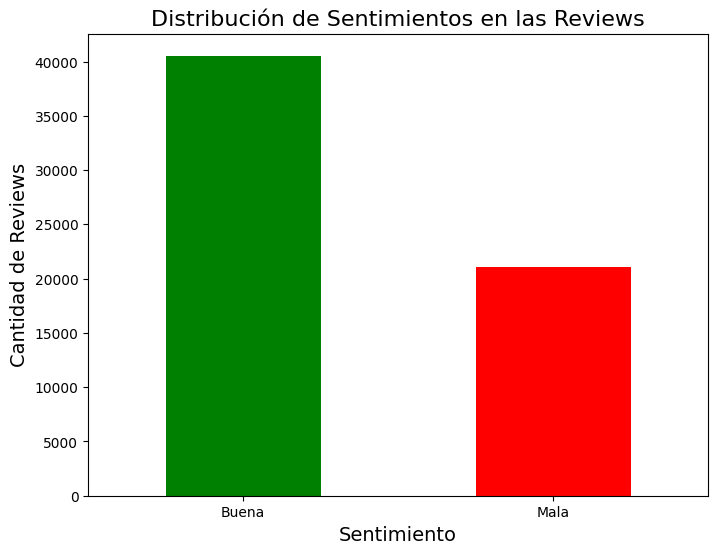

In [21]:
import matplotlib.pyplot as plt

# Contar la cantidad de revisiones buenas y malas
sentiment_counts = df['Sentiment'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'])

# Añadir título y etiquetas
plt.title('Distribución de Sentimientos en las Reviews', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Cantidad de Reviews', fontsize=14)
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()